In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Metadata

Survived - target class: 0 = dead, 1 = alive

Pclass - ticket class: 1 = 1st class, 2 = 2nd class, 3 = 3rd class

Name - name of the passenger

Sex - gender of the passenger

Age - age of the passenger

SipSp - number of sibling/spouse aboard

Parch - number of parent/children aboard

Ticket - ticket number

Fare - ticket price

Cabin - cabin number

Embarked - Port of embarkment: C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
train_data.shape
#Will return the number of rows and columns in the dataset 

(891, 12)

In [7]:
train_data.info()
#Will return the type and non-null count of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.nunique()
#Will return the count of unique items of the feature

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are many missing values for the attribute 'Age' and 'Cabin'


## Visualization 

We are using bar chart to check the corelation for the categorical features

In [27]:
def barchart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

groupby(col).count() is mostly used for the dataset as a whole and value_counts() is used for series and that particular column alone.

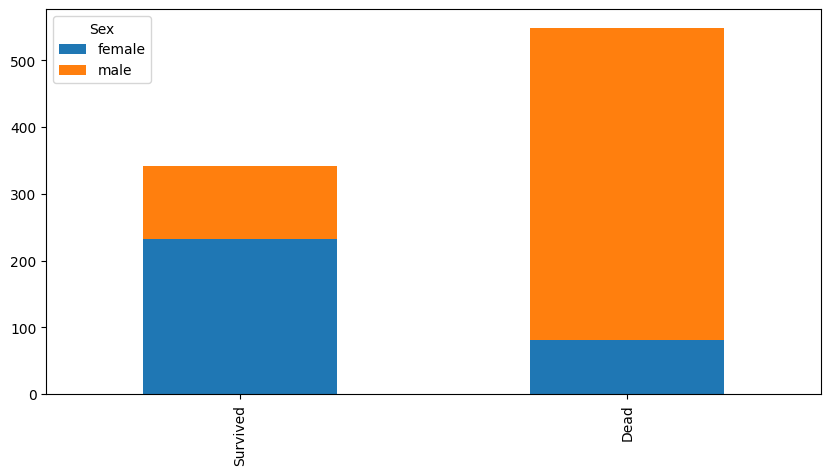

In [25]:
barchart('Sex')

We can see from the bar chart from most of  the females survived compared to the men

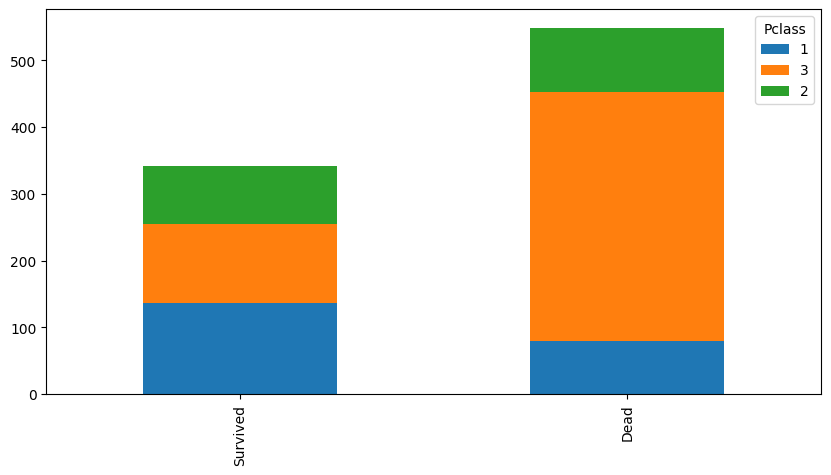

In [28]:
barchart('Pclass')

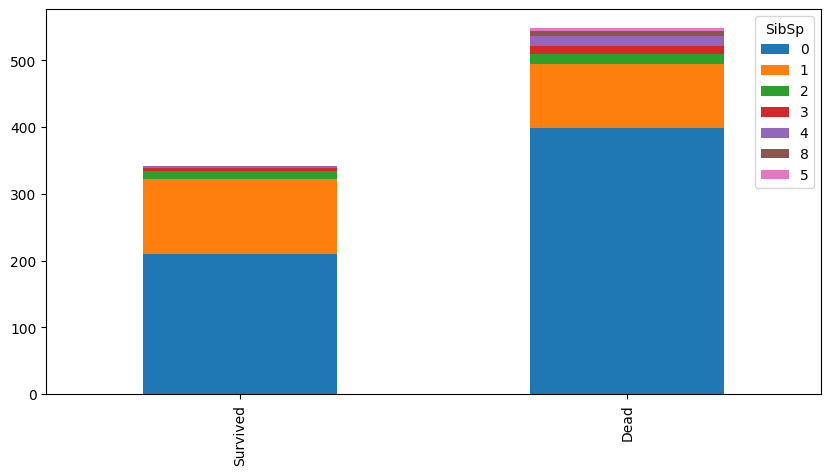

In [30]:
barchart('SibSp')

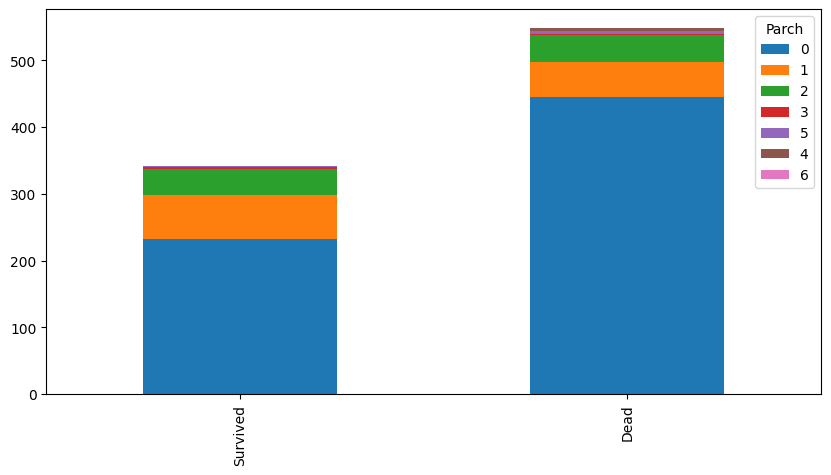

In [31]:
barchart('Parch')

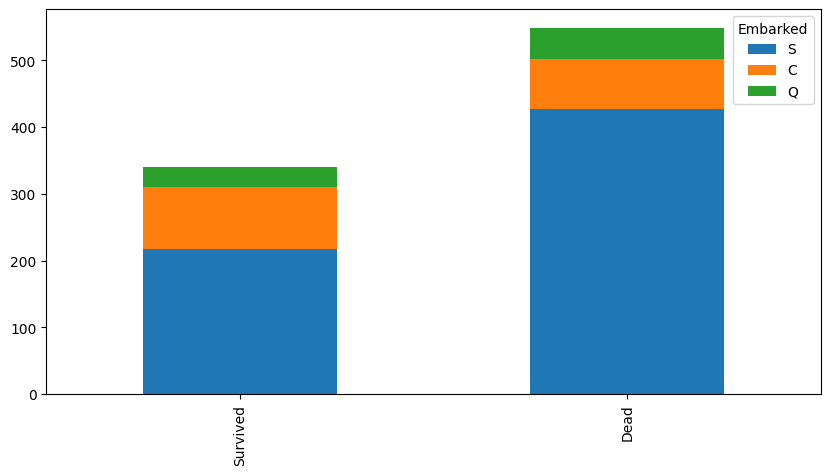

In [32]:
barchart('Embarked')

In [68]:
for i in train_data:
    name = train_data['Name']
    title = name.str.extract( ' ([a-zA-z]+)\.', expand = False)
    train_data['Title'] = title


In [69]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [73]:
for i in train_data:
    title = train_data['Title'].astype("string")
    if(title == "Mr"):
        print("Yes")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().